In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = '../data/raw/2nd_test'

def load_single_file(filemane):
	"""
	Downloading a single file with vibration
	"""
	file_path = os.path.join(DATA_DIR, filemane)

	df = pd.read_csv(file_path, sep='\t', header=None)

	df.columns = ['Bearing_1', 'Bearing_2', 'Bearing_3', 'Bearing_4']

	return df


In [3]:
files = sorted(os.listdir(DATA_DIR))
print(f'Found {len(files)} of measurement files')

first_file = files[0]
df_healthy = load_single_file(first_file)

print(f"\n--- Analizying file: {first_file} ---")
print(f'Shape of the file(rows, columns): {df_healthy.shape}')
print('First 5 rows')
print(df_healthy.head())

Found 984 of measurement files

--- Analizying file: 2004.02.12.10.32.39 ---
Shape of the file(rows, columns): (20480, 4)
First 5 rows
   Bearing_1  Bearing_2  Bearing_3  Bearing_4
0     -0.049     -0.071     -0.132     -0.010
1     -0.042     -0.073     -0.007     -0.105
2      0.015      0.000      0.007      0.000
3     -0.051      0.020     -0.002      0.100
4     -0.107      0.010      0.127      0.054


In [4]:
last_file = files[-1]
df_failure = load_single_file(last_file)

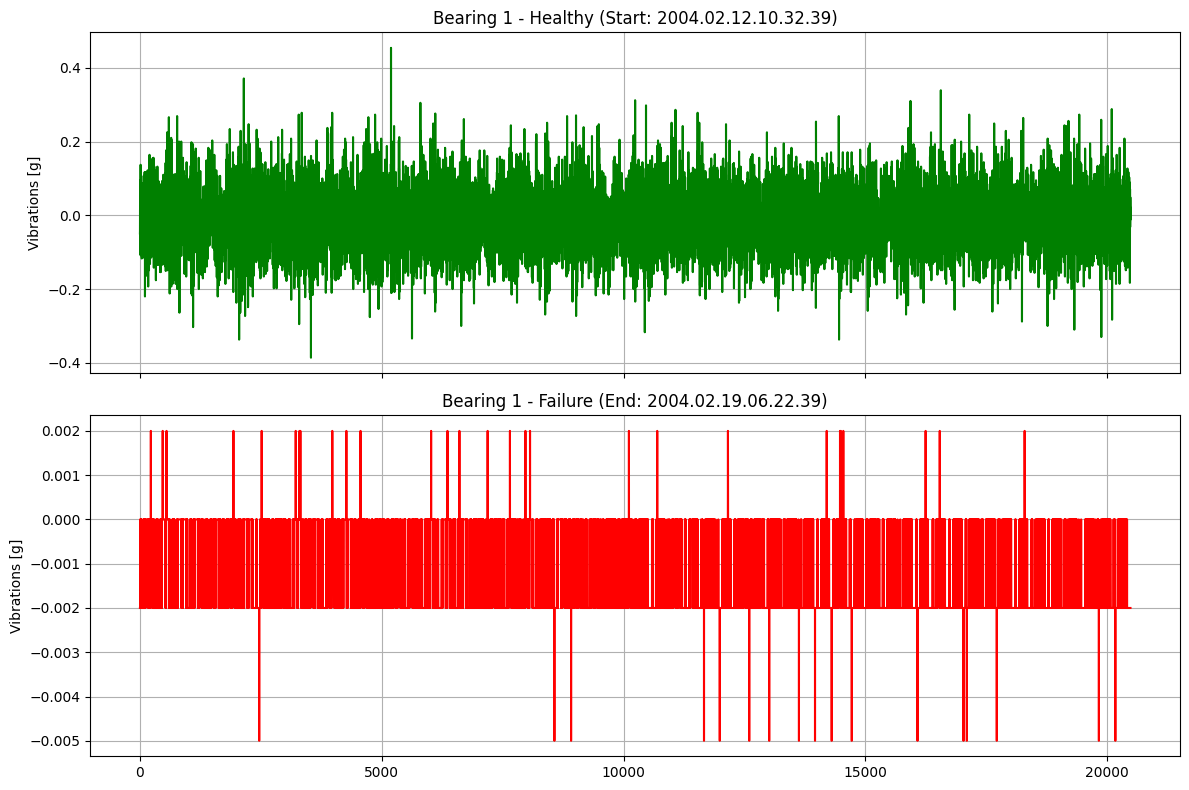

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax[0].plot(df_healthy['Bearing_1'], color='green')
ax[0].set_title(f'Bearing 1 - Healthy (Start: {first_file})')
ax[0].set_ylabel('Vibrations [g]')
ax[0].grid(True)

ax[1].plot(df_failure['Bearing_1'], color='red')
ax[1].set_title(f'Bearing 1 - Failure (End: {last_file})')
ax[1].set_ylabel('Vibrations [g]')
ax[1].grid(True)

plt.tight_layout()
plt.show()